In [ ]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers? or are devices slower 
#have there been more drops in download, have upload/download times increased, has ping time increased 

#Completely biffed this 



In [ ]:
# Is the website redesign any good?
# has traffic increased? has traffic decreased? 
#has there been ddos type activity, have we had more clicks per visit,
#have we had more ad revenue, or less, has there been mroe contact via email 

In [ ]:
# Is our television ad driving more sales?
#has sales incrreases since ads reeleased
# sales have not increased due to television ads 

In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from math import sqrt
from pydataset import data

np.random.seed(123)


In [2]:
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1, 7, (nrows, ncols))

data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [3]:
calculated_averages = data.mean(axis=1)
calculated_averages


array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

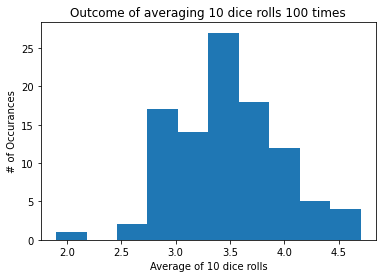

In [5]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')
plt.show()


In [8]:
db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  

In [9]:
df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

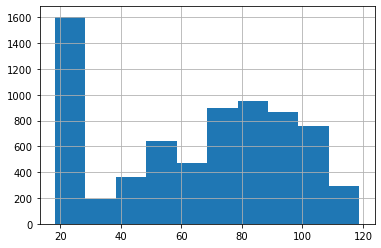

In [10]:
df.monthly_charges.hist()
plt.show()

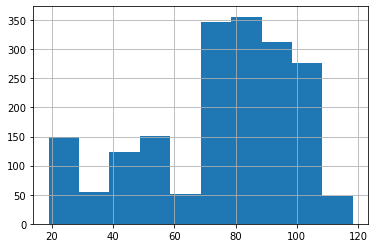

In [12]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()
plt.show()

In [13]:
α = .05
df.churn.value_counts()


No     5174
Yes    1869
Name: churn, dtype: int64

In [14]:
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, α)


16.96540308050567 1.8703196496911995e-60 0.05


In [59]:
${H0: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers}$
$Ha: Mean of monthly charges of churned customers > Mean of monthly charges of all customers$

SyntaxError: invalid syntax (3886440910.py, line 1)

In [16]:
if p/2 > α:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [19]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p


(16.96540308050567, 3.740639299382399e-60)

In [21]:
print(t < 0)
print(p/2 < α)


False
True


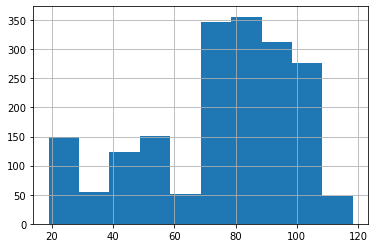

In [23]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()
plt.show()

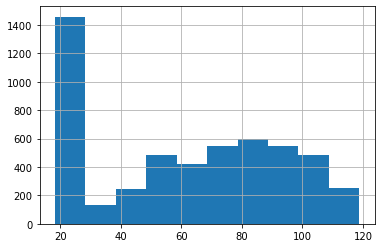

In [24]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()
plt.show()

In [33]:
print(churn_sample.var())
print(no_churn_sample.var())


608.4141833954315
966.7527670734293


In [26]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p / 2


(18.407526676414673, 4.2962246657737696e-73)

In [27]:
print("is p/2 < α? ", p / 2 < α)
print("is t > 0? ", t > 0)


is p/2 < α?  True
is t > 0?  True


In [28]:
if p / 2 > α:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [29]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p


(18.407526676414673, 8.592449331547539e-73)

In [30]:
print("Reject $H_{0}$? ", p < α)


Reject $H_{0}$?  True


In [32]:
df = sns.load_dataset('iris')
df.species.value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [34]:
df.sepal_length.describe()


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [35]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length


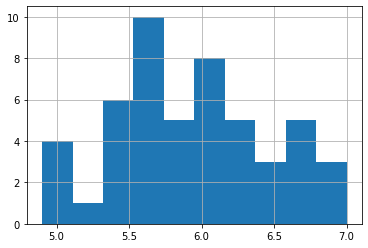

In [36]:
versicolor_sepal_length.hist()
plt.show()

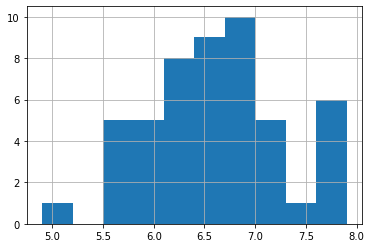

In [37]:
virginica_sepal_length.hist()
plt.show()

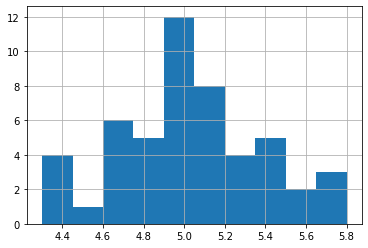

In [38]:
setosa_sepal_length.hist()
plt.show()

In [39]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())


0.2664326530612246
0.40434285714285706
0.12424897959183666


In [40]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p


(119.26450218450472, 1.6696691907693648e-31)

In [41]:
if p < α:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")


We reject $H_{0}$


In [42]:
df = sns.load_dataset('mpg')
df.origin.value_counts()


usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [43]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [44]:
df = df[~df['horsepower'].isna()]


In [45]:
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower
eu_hp = df[df.origin == 'europe'].horsepower


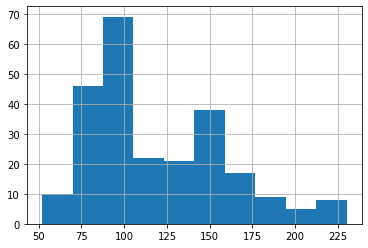

In [46]:
usa_hp.hist()
plt.show()

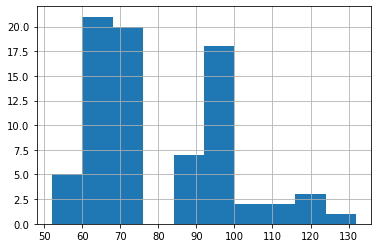

In [47]:
japan_hp.hist()
plt.show()

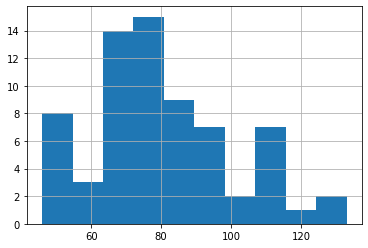

In [48]:
eu_hp.hist()
plt.show()

In [49]:
usa_hp.var()


1591.8336567413864

In [50]:
japan_hp.var()


317.5238558909445

In [51]:
eu_hp.var()


406.3397717295875

In [52]:
usa_hp = df[df.origin == 'usa'].horsepower
non_usa_hp = df[df.origin != 'usa'].horsepower


In [53]:
print(usa_hp.var())
print(non_usa_hp.var())


1591.8336567413864
356.2380020501352


In [54]:
t, p = stats.ttest_ind(usa_hp, non_usa_hp, equal_var=False)
t, p


(13.017135027378012, 3.384733024288272e-32)

In [56]:
p < α


True

In [57]:
stats.kruskal(usa_hp, japan_hp, eu_hp)


KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

In [4]:
# Ace Realty wants to determine whether the average time it takes to sell 
# homes is different for its two offices. A sample of 40 sales from office
# #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office 
# #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

o1s=40
o1m= 90
o1sd=15
o2s=50
o2m=100
o2sd=20
sig=.05

In [6]:
office_1 = stats.norm(o1m, o1sd).rvs(o1s)
office_2 = stats.norm(o2m, o2sd).rvs(o2s)

In [8]:
stat, p_val = stats.levene(office_1, office_2)
if p_val < sig:
    print("We can reject H0; they're inequal.")

In [9]:
t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=False) # Levene test gave us the equal_var, by disproving N0 we enter False.
if p_val < sig:
    print("We can reject the Null Hypothosis. There is some difference.")
else:
    print("We cannot reject the Null Hypothosis, there is little to no difference.")

We can reject the Null Hypothosis. There is some difference.


In [80]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [124]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

from pydataset import data
df = pd.DataFrame(data('mpg'))
df['ampg'] = df.cty + df.hwy/2

In [125]:
c2008_my = df[df.year == 2008].ampg
c1999_my = df[df.year == 1999].ampg

In [126]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  ampg          234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


<AxesSubplot:>

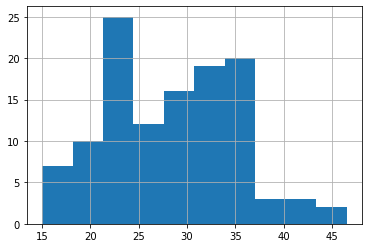

In [127]:
c2008_my.hist()


<AxesSubplot:>

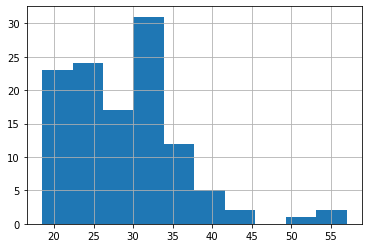

In [128]:
c1999_my.hist()


In [154]:
df.rename(columns = {'class':'ctype'}, inplace = True)


pd.unique(df.ctype)

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [130]:
c1999_my.var()


54.9290450928382

In [131]:
c2008_my.var()

47.87183171234894

In [190]:
t, p = stats.ttest_ind(c1999_my, c2008_my)
t, p
#Apparently I did this backwards
#t, p = stats.ttest_ind(c2008_my, c1999_my, equal_var=False)
#t, p


(0.3236957615075298, 0.7464599863171417)

In [191]:
p < α


False

In [155]:
# Are compact cars more fuel-efficient than the average car?
average_mpg = df[df.ctype == 'midsize'].ampg
comp_mpg = df[df.ctype == 'compact'].ampg

# Do manual cars get better gas mileage than automatic cars?

In [156]:
t2, p2 = stats.ttest_ind(comp_mpg, average_mpg, equal_var=False)
t2, p2


(2.1224944799623238, 0.037152598005748806)

In [157]:
comp_mpg.var(),average_mpg.var()

(27.041396854764116, 8.377743902439025)

In [158]:
stat, p_levene = stats.levene(comp_mpg, average_mpg)
if p_levene < 0.05:
    print('we can reject the H0')
else:
    print('we cannot reject the H0')

we can reject the H0


In [164]:
pd.unique(df.trans)

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [160]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  ctype         234 non-null    object 
 11  ampg          234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [178]:
# Do manual cars get better gas mileage than automatic cars?
manual_mpg = df[df['trans'].str.contains('manual')].ampg
auto_mpg = df[df['trans'].str.contains('auto')].ampg

In [187]:
#t3, p3 = stats.ttest_ind(manual_mpg, average_mpg, equal_var=False)
t3, p3 = stats.levene(manual_mpg, average_mpg)

t3< p3


False

<AxesSubplot:>

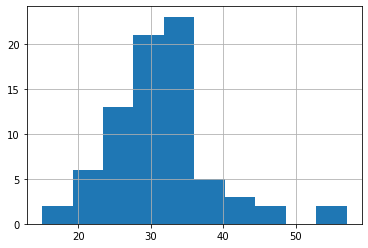

In [186]:
manual_mpg.hist() 

<AxesSubplot:>

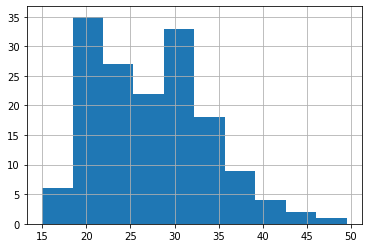

In [184]:
auto_mpg.hist()

In [183]:
stat, p_levene = stats.levene(manual_mpg, auto_mpg)
if p_levene < 0.05:
    print('we can reject the H0')
else:
    print('we cannot reject the H0')

we cannot reject the H0


In [192]:
url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


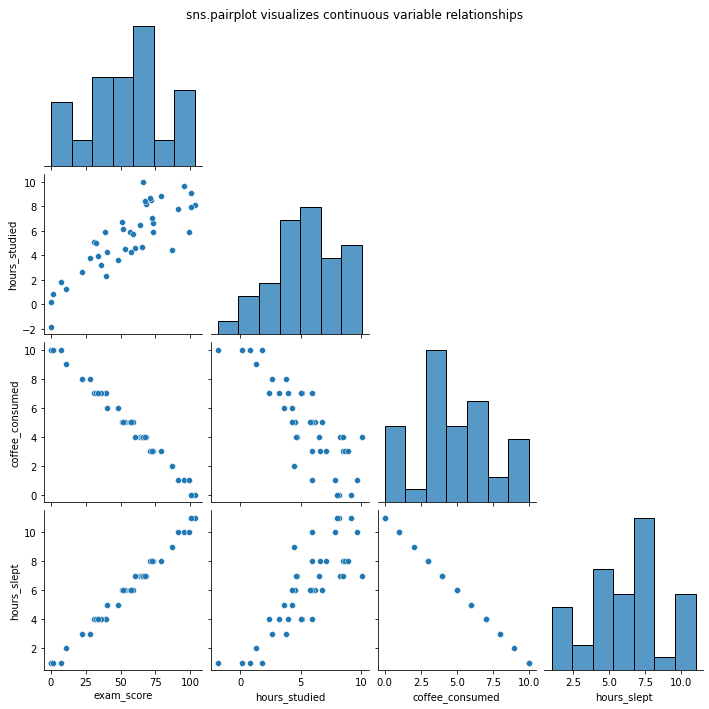

In [193]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()


In [194]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval


In [199]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy


0.8351498542413306

In [200]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t


9.359998377263368

In [201]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p


2.0762953315463266e-11

In [202]:
p < α


True

In [203]:
corr, p = stats.pearsonr(x, y)
corr, p


(0.8351498542413305, 2.0762953315463534e-11)

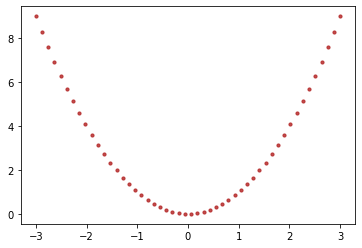

In [204]:
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=.8)


In [205]:
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')


r = -0.00000
p = 1.0


In [206]:
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')


r = -0.00000
p = 1.0


Text(8, 80, 'r = -0.994')

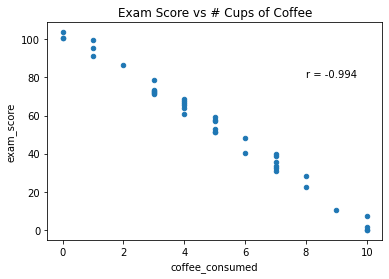

In [207]:
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)

df.plot.scatter('coffee_consumed', 'exam_score')
plt.title('Exam Score vs # Cups of Coffee')
plt.text(8, 80, f'r = {r:.3f}')


In [208]:
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')


Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


Text(1, 63, 'p = 0.000000e+00')

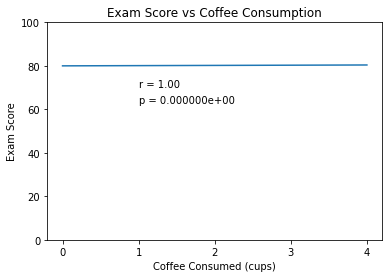

In [209]:
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]
r, p = stats.pearsonr(cups_of_coffee, exam_score)

plt.plot(cups_of_coffee, exam_score)
plt.title('Exam Score vs Coffee Consumption')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('Coffee Consumed (cups)')
plt.ylabel('Exam Score')

plt.text(1, 70, f'r = {r:.2f}')
plt.text(1, 63, f'p = {p:e}')


# Use the telco_churn data. 


In [264]:
df = pd.read_csv('Telco_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Does tenure correlate with monthly charges? 


r= 0.24789985628615002


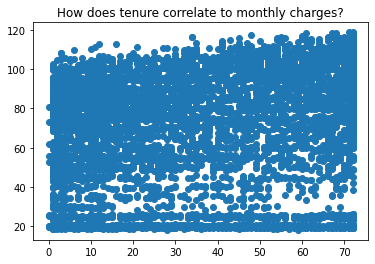

In [217]:
r, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
plt.scatter(df.tenure, df.MonthlyCharges)
plt.title('How does tenure correlate to monthly charges?')
print('r=', r)



In [234]:
# df.head(5)

# df
 
# df.astype('TotalCharges' float)
df.TotalCharges =df.TotalCharges.astype('float')
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# Total charges? 


r= 0.8261783979502422


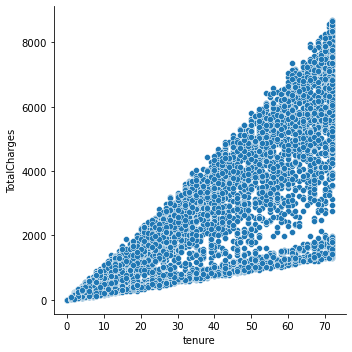

In [236]:

r, p = stats.pearsonr(df.tenure, df.TotalCharges)
# plt.scatter(df.tenure, df.TotalCharges)
# plt.title('How does tenure correlate to Total Charges?')
sns.relplot(data=df, x='tenure', y='TotalCharges')
print('r=', r)



# What happens if you control for phone and internet service?

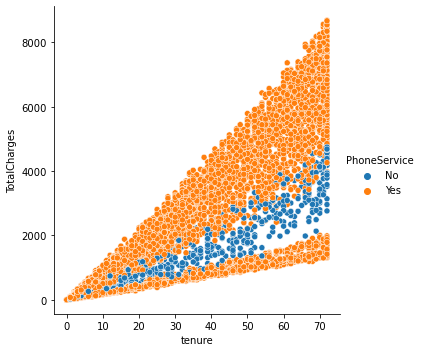

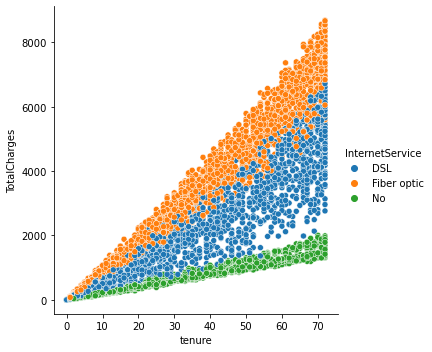

In [286]:


r, p = stats.pearsonr(df.tenure, df.TotalCharges)
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='PhoneService')
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='InternetService')

print('r=', r)
plt.show()

In [295]:
yes_phones = df [ df.PhoneService == 'Yes']
no_phones = df [ df.PhoneService == 'No']
yes_phones_r, yes_phones_p = stats.pearsonr(yes_phones.tenure, yes_phones.TotalCharges)
no_phones_r,no_phones_p = stats.pearsonr(no_phones.tenure, no_phones.TotalCharges)

print('Yes','No')
print('  yes_phones_r =', yes_phones_r,'  no_phones_r =', no_phones_r)
print('  yes_phones_p =', yes_phones_p,'  no_phones_p =', no_phones_p)

Yes No
  yes_phones_r = 0.8301076972900364   no_phones_r = 0.9535697728407464
  yes_phones_p = 0.0   no_phones_p = 0.0


In [296]:
yes_net = df [ df.InternetService !='No']
no_net = df [ df.InternetService == 'No']
yes_net_r, yes_net_p = stats.pearsonr(yes_net.tenure, yes_net.TotalCharges)
no_net_r,no_net_p = stats.pearsonr(no_net.tenure, no_net.TotalCharges)

print('Yes','No')
print('  yes_net_r =', yes_net_r,'  no_net_r =', no_net_r)
print('  yes_net_p =', yes_net_p,'  no_net_p =', no_net_p)

Yes No
  yes_net_r = 0.9320165580130639   no_net_r = 0.9815669784401057
  yes_net_p = 0.0   no_net_p = 0.0


# Use the employees database.
# Is there a relationship between how long an 
# employee has been with the company and their salary?


In [11]:
import env
user = env.user
password = env.password
host = env.host
schema = 'employees'

In [12]:
query = '''
        SELECT * FROM 
        employees
        JOIN salaries USING (emp_no)
        WHERE to_date > CURDATE();
'''

In [14]:
connect = f'mysql+pymysql://{user}:{password}@{host}/{schema}'
employ = pd.read_sql(query, connect)

# Is there a relationship between how long an 
# employee has been with the company and the number of titles they have had?

In [18]:
employ['tenure'] = (employ.to_date - employ.hire_date).astype('str').str.split(' ', expand=True)[0].astype(int)


In [19]:
x = employ.tenure
y = employ.salary
r,p = stats.pearsonr(x,y)
r,p

(0.30646256131860766, 0.0)

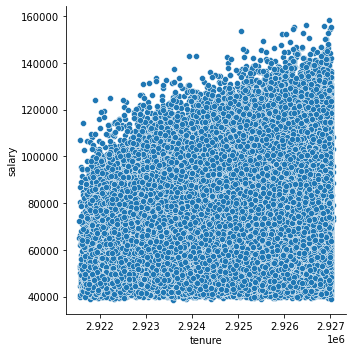

In [21]:
sns.relplot(data=employ, x='tenure', y='salary')
plt.show()


In [22]:
new_query = '''
SELECT emp_no
, datediff(max(to_date), min(from_date)) as tenure
, count(title) as num_titles
FROM titles
GROUP BY emp_no
HAVING max(to_date) = '9999-01-01'
;
'''

In [23]:
employ2 = pd.read_sql(new_query, connect)


In [24]:
employ2.info(), employ2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   tenure      240124 non-null  int64
 2   num_titles  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


(None,
    emp_no   tenure  num_titles
 0   10001  2926512           1
 1   10002  2922821           1
 2   10003  2923065           1
 3   10004  2926354           2
 4   10005  2925338           2)

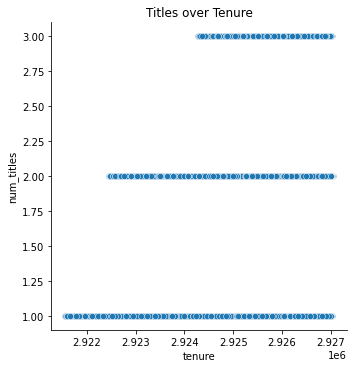

In [29]:
sns.relplot(data=employ2, x=employ2.tenure, y=employ2.num_titles)
plt.title("Titles over Tenure")
plt.show()

In [30]:
r, p = stats.pearsonr(employ2.tenure, employ2.num_titles)
r, p

(0.5311014974064858, 0.0)

# Use the sleepstudy data. Is there a relationship between days and reaction time?


In [31]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [32]:
x = sleep.Days
y = sleep.Reaction
r,p = stats.pearsonr(x,y)
r,p

(0.5352302262650253, 9.894096322214812e-15)

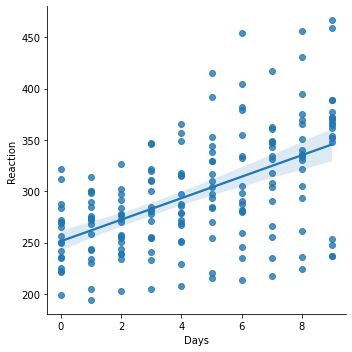

In [33]:
sns.lmplot(data=sleep, x='Days', y='Reaction')
plt.show()

# The χ2 Contingency Table Test

In [305]:
import pandas as pd
from scipy import stats
from pydataset import data

mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] # a little cleaning goes a long way
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [306]:
n = mpg.shape[0]

transmission_proportions = mpg.transmission.value_counts() / n
transmission_proportions


auto      0.67094
manual    0.32906
Name: transmission, dtype: float64

In [307]:
drive_proportions = mpg.drv.value_counts() / n
drive_proportions


f    0.452991
4    0.440171
r    0.106838
Name: drv, dtype: float64

In [308]:
expected = pd.DataFrame()

for transmission_group, t_prop in transmission_proportions.iteritems():
    for drive_group, d_prop in drive_proportions.iteritems():
        expected.loc[drive_group, transmission_group] = t_prop * d_prop

expected.sort_index(inplace=True)
expected


,auto,manual
4,0.295328,0.144843
f,0.303930,0.149061
r,0.071682,0.035156


In [309]:
expected *= n
expected


,auto,manual
4,69.106838,33.893162
f,71.119658,34.880342
r,16.773504,8.226496


In [310]:
observed = pd.crosstab(mpg.drv, mpg.transmission)
observed


transmission,auto,manual
drv,,
4,75,28
f,65,41
r,17,8


In [311]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2


3.136769245971112

In [312]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)


In [313]:
stats.chi2(degrees_of_freedom).sf(chi2)


0.20838152534979645

In [314]:
index = ['Churn', 'No Churn']
columns = ['Product A', 'Product B']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed
          Product A  Product B
Churn           100         50
No Churn        120         28
---
Expected
          Product A  Product B
Churn       110.856     39.336
No Churn    109.366     38.740
---

chi^2 = 7.9656
p     = 0.0048


In [315]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[100  50]
 [120  28]]
---
Expected

[[110.73825503  39.26174497]
 [109.26174497  38.73825503]]
---

chi^2 = 7.2817
p     = 0.0070


# Use the following contingency table to help answer the question of whether
# using a macbook and being a codeup student are independent of each other


In [320]:
index = ['Uses a Macbook', 'Doesnt use a Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
stats.chi2_contingency(observed)
chi2, p, degf, expected = stats.chi2_contingency(observed)

#n = observed.values.sum()

# expected = pd.DataFrame([[(49/69), (20/69)], [.367, .130]], index=index, columns=columns) * n

# chi2 = ((observed - expected)**2 / expected).values.sum()

# nrows, ncols = observed.shape

# degrees_of_freedom = (nrows - 1) * (ncols - 1)

# p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
                      Codeup Student  Not Codeup Student
Uses a Macbook                    49                  20
Doesnt use a Macbook               1                  30
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 1.4116760526193828e-09


In [328]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
transmission     2
dtype: int64

In [329]:
mpg.head


<bound method NDFrame.head of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class transmission  
1    compact         auto  
2    compact 

In [333]:
observed = pd.crosstab(mpg.year, mpg.transmission)
observed

transmission,auto,manual
year,,
1999,74,43
2008,83,34


In [334]:
stats.chi2_contingency(observed)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
transmission  auto  manual
year                      
1999            74      43
2008            83      34
---
Expected
[[78.5 38.5]
 [78.5 38.5]]
---

chi^2 = 1.2388
p     = 0.2657001056392438


# Use the data from the employees database to answer these questions:

# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
# Is an employee's gender independent of whether or not they are or have been a manager?

In [34]:
query = '''
        SELECT * FROM employees
        JOIN dept_emp USING (emp_no)
        JOIN departments USING (dept_no)
        WHERE to_date > CURDATE();
'''

In [35]:
schema = 'employees'
connect = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{schema}'
df = pd.read_sql(query, connect)

In [36]:
df.head()


,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service


In [37]:
df.nunique()


dept_no            9
emp_no        240124
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5425
from_date       6393
to_date            1
dept_name          9
dtype: int64

In [38]:
df2 = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]


In [48]:
observed = pd.crosstab(df2.gender, df2.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [49]:
chi2, pvalue, degfreq, expected = stats.chi2_contingency(observed)
chi2, pvalue, degfreq, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [50]:
query = '''
        SELECT employees.emp_no, 
        gender,
        IF (employees.emp_no in (SELECT emp_no FROM dept_manager), True, False) AS is_manager
        FROM employees
        LEFT JOIN dept_emp USING (emp_no)
        LEFT JOIN dept_manager USING (emp_no)
        WHERE dept_emp.to_date > CURDATE();
'''

In [51]:
schema = 'employees'
connect = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{schema}'
df = pd.read_sql(query, connect)

In [52]:
df.head()


,emp_no,gender,is_manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [53]:
observed = pd.crosstab(df.gender, df.is_manager)
observed

is_manager,0,1
gender,,
F,95997,13
M,144103,11


In [57]:
chi2, pvalue, degfreq, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pvalue  = {pvalue:.4f}')
print(f'degfreq  = {degfreq:.4f}')


Observed

[[ 95997     13]
 [144103     11]]
---
Expected

[[9.60004040e+04 9.59604204e+00]
 [1.44099596e+05 1.44039580e+01]]
---

chi^2 = 1.4644
pvalue  = 0.2262
degfreq  = 1.0000
